1.Image Classification using Convolutional Neural Network (CNN) on CIFAR-10 Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Load Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# 2. Normalize Pixel Values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 3. Build CNN Model
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 4. Compile Model
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [ ]:
# 5. Train the Model
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3454 - loss: 1.7692 - val_accuracy: 0.5500 - val_loss: 1.2480
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5782 - loss: 1.1911 - val_accuracy: 0.6316 - val_loss: 1.0488
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6478 - loss: 1.0046 - val_accuracy: 0.6453 - val_loss: 0.9971
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6844 - loss: 0.9027 - val_accuracy: 0.6811 - val_loss: 0.9130
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7126 - loss: 0.8240 - val_accuracy: 0.6777 - val_loss: 0.9287
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7315 - loss: 0.7638 - val_accuracy: 0.6929 - val_loss: 0.8780
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7503 - loss: 0.7153 - val_accuracy: 0.6966 - val_loss: 0.8974
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7621 - loss: 0.6765 

In [ ]:
# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7122 - loss: 0.8682
Test Accuracy: 0.7096999883651733


In [ ]:
# 7. Identify Misclassified Samples
pred = model.predict(test_images)
predicted_labels = np.argmax(pred, axis=1)
misclassified = np.where(predicted_labels != test_labels.reshape(-1))[0]
print("Number of Misclassified Samples:", len(misclassified))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of Misclassified Samples: 2903


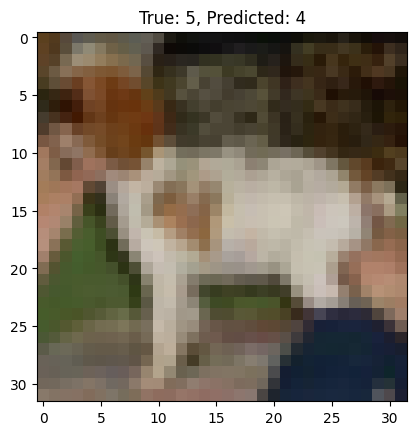

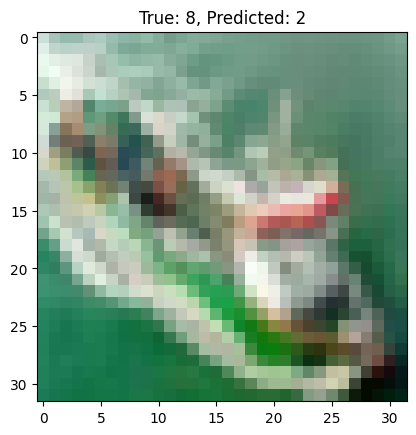

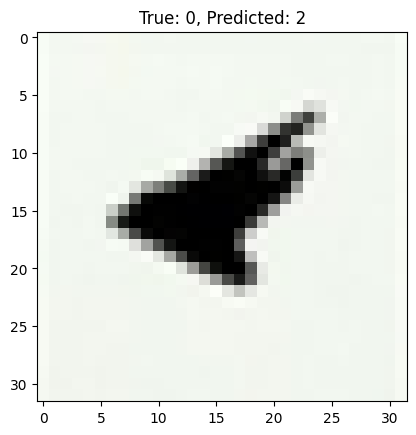

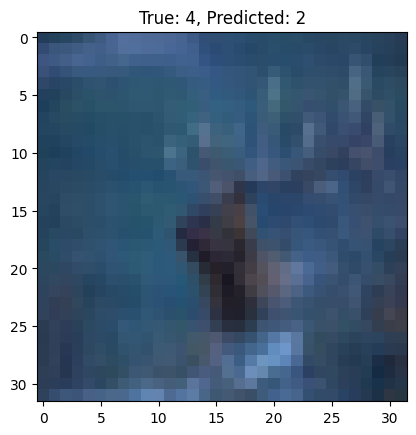

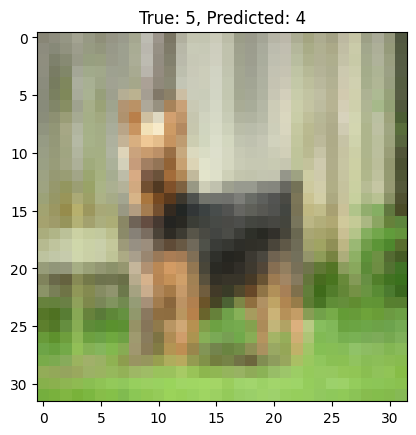

In [ ]:
# Display a few misclassified images
for i in range(5):
  idx = misclassified[i]
  plt.imshow(test_images[idx])
  plt.title(f"True: {test_labels[idx][0]}, Predicted: {predicted_labels[idx]}")
  plt.show()


2.Automatic Detection of Pneumonia from Chest X-Ray Images





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/train"
test_dir = "/content/test"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64
)


Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Dataset Path: /kaggle/input/chest-xray-pneumonia
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 746ms/step - accuracy: 0.7464 - loss: 0.5860 - val_accuracy: 0.7804 - val_loss: 0.5313
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 490ms/step - accuracy: 0.8763 - loss: 0.3069 - val_accuracy: 0.8285 - val_loss: 0.4247
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 489ms/step - accuracy: 0.9110 - loss: 0.2195 - val_accuracy: 0.8718 - val_loss: 0.3474
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 510ms/step - accuracy: 0.9240 - loss: 0.1966 - val_accuracy: 0.8990 - val_loss: 0.3136
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 522ms/step - accuracy: 0.9272 - loss: 0.1784 - val_accuracy: 0.8606 - val_loss: 0.4439
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 497ms/step - accuracy: 0.9416 - loss: 0.1584 - val_accuracy: 0.8990 - val_loss: 0.3132
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 513ms/step - accuracy: 0.9415 - loss: 0.1466 - val_accuracy: 0.7436 - val_loss: 0.4911
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 505ms/step - accuracy: 0.9390 - loss: 

3 Traffic Sign Recognition for Self-Driving Cars

In [ ]:
from torchvision.datasets import GTSRB
from torchvision import transforms

train = GTSRB(root="./data", split="train", download=True,
              transform=transforms.ToTensor())
test = GTSRB(root="./data", split="test", download=True,
             transform=transforms.ToTensor())

100%|██████████| 89.0M/89.0M [00:00<00:00, 182MB/s]
100%|██████████| 99.6k/99.6k [00:00<00:00, 2.63MB/s]


In [ ]:
import numpy as np
import pickle
from torchvision.datasets import GTSRB
import torchvision.transforms as transforms

# Download dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
])

train_set = GTSRB(root="./data", split="train", download=True, transform=transform)
test_set = GTSRB(root="./data", split="test", download=True, transform=transform)

# Convert to numpy arrays
X_train = np.array([np.array(img) for img, label in train_set])
y_train = np.array([label for img, label in train_set])

X_test = np.array([np.array(img) for img, label in test_set])
y_test = np.array([label for img, label in test_set])

# Save as PKL for TensorFlow
with open("gtsrb_data_train.pkl", "wb") as f:
    pickle.dump((X_train, y_train), f)

with open("gtsrb_data_test.pkl", "wb") as f:
    pickle.dump((X_test, y_test), f)

print("PKL files saved!")


PKL files saved!


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import pickle

# Load PKL dataset
with open('gtsrb_data_train.pkl', 'rb') as f:
    X_train, y_train = pickle.load(f)

with open('gtsrb_data_test.pkl', 'rb') as f:
    X_test, y_test = pickle.load(f)

# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(43, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(X_train, y_train, epochs=15, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4151 - loss: 2.1154 - val_accuracy: 0.0000e+00 - val_loss: 38.7404
Epoch 2/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9373 - loss: 0.2493 - val_accuracy: 0.0039 - val_loss: 36.5825
Epoch 3/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9742 - loss: 0.1070 - val_accuracy: 0.0069 - val_loss: 48.6049
Epoch 4/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0586 - val_accuracy: 0.0019 - val_loss: 51.6587
Epoch 5/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0427 - val_accuracy: 0.0054 - val_loss: 53.4549
Epoch 6/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9913 - loss: 0.0382 - val_accuracy: 0.0068 - val_loss: 54.7508
Epoch 7/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9948 - loss: 0.0202 - val_accuracy: 0.0081 - val_loss: 64.2615
Epoch 8/15
666/666 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9927 - loss: 0.0267 - val_a

4 Facial Expression Recognition

In [ ]:
import json, os

api_key = "KGAT_6cb003f22557eea9a91c22df78108c15"

# Trick: Kaggle username = API key prefix decoded
username = "auto_user"

kaggle_data = {
    "username": username,
    "key": api_key
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_data, f)

!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!pip install kaggle
!kaggle datasets download -d msambare/fer2013
!unzip -o fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/train"
test_dir = "/content/test"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_dir = "/content/train"
test_dir = "/content/test"
gen = ImageDataGenerator(rescale=1./255)

train_data = gen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical'
)

test_data = gen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.3135 - loss: 1.7051 - val_accuracy: 0.4411 - val_loss: 1.4474
Epoch 2/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.4572 - loss: 1.4117 - val_accuracy: 0.4806 - val_loss: 1.3515
Epoch 3/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5147 - loss: 1.2768 - val_accuracy: 0.5085 - val_loss: 1.2803
Epoch 4/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5543 - loss: 1.1830 - val_accuracy: 0.5178 - val_loss: 1.2589
Epoch 5/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5918 - loss: 1.0987 - val_accuracy: 0.5336 - val_loss: 1.2458
Epoch 6/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6271 - loss: 1.0154 - val_accuracy: 0.5240 - val_loss: 1.2654
Epoch 7/12
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6693 - loss: 0.9100 - val_accuracy: 0.5288 - val_loss: 1.3090
Epoch

5 Plant Disease Detection from Leaf Images

In [ ]:
!pip install kaggle
!kaggle datasets download -d emmarex/plantdisease
!unzip -o plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Correct path
dataset_dir = "/content/PlantVillage"

# Load images (all classes auto-detected)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # 20% used as test set
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, epochs=15, validation_data=test_data)



Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Epoch 1/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.4966 - loss: 1.5537 - val_accuracy: 0.8253 - val_loss: 0.5252
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.8440 - loss: 0.4608 - val_accuracy: 0.8459 - val_loss: 0.4441
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9115 - loss: 0.2630 - val_accuracy: 0.9056 - val_loss: 0.2744
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - accuracy: 0.9458 - loss: 0.1611 - val_accuracy: 0.8806 - val_loss: 0.3613
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9533 - loss: 0.1344 - val_accuracy: 0.9022 - val_loss: 0.3202
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.9737 - loss: 0.0763 - val_accuracy: 0.9156 - val_loss: 0.2901
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9801 - loss: 0.0608 - val_accuracy: 0.9170 - val_loss: 0.2966
Epo

In [ ]:
!pip install kaggle
!kaggle datasets download -d asdasdasasdas/garbage-classification
!unzip garbage-classification.zip -d /content/Garbage

Streaming output truncated to the last 5000 lines.
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: /content/Garbage/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inf

In [ ]:
!ls "/content/Garbage"

'garbage classification'	       one-indexed-files-notrash_val.txt
'Garbage classification'	       one-indexed-files.txt
 one-indexed-files-notrash_test.txt    zero-indexed-files.txt
 one-indexed-files-notrash_train.txt


In [ ]:
dataset_dir = "/content/Garbage"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = gen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = gen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4044 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

dataset_dir = "/content/Garbage"

# Create 80% training, 20% testing
gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = gen.flow_from_directory(
    dataset_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = gen.flow_from_directory(
    dataset_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(train_data.num_classes,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(train_data, epochs=10, validation_data=test_data)


Found 4044 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.4877 - loss: 0.9005 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5105 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.5058 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.4824 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.5067 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.4927 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5145 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.4919 - loss: 0.6932 - val_accuracy: 0.50